# Assignment 2: Due Tuesday 9/17

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function 

In [12]:
#define projectile motion function in vaccum
import numpy as np
from scipy import integrate
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

radius = 0.075 #m
density = 780.0 #g/m^3
volume_sphere = (4/3)*(np.pi)*(radius**3) #m^3

mass_grams = density*volume_sphere
mass = mass_grams/1000

def proj_vac (t, state):
    g_constant = 9.8 #m/s
    
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = 0
    y_ddot = -g_constant
    
    dstate_dt = np.array([x_dot, y_dot, x_ddot, y_ddot])
    return dstate_dt

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [13]:
initial_velocity = 300
firing_angle_in_degrees = 50
firing_angle_in_radians = 50 * np.pi/180

X_0, Y_0 = 0, 0
VX_0 = initial_velocity * np.cos(firing_angle_in_radians)
VY_0 = initial_velocity * np.sin(firing_angle_in_radians)

state_0 = [X_0, Y_0, VX_0, VY_0]

t0 = 0 #s
tf = 50 #s
t = np.linspace(t0, tf, 10_000)

proj_vac_RK45 = integrate.solve_ivp(proj_vac, (t0, tf), state_0, method='RK45', t_eval=t)

zero_locations = []

for i in range(len(proj_vac_RK45.y[1])):
    if round(proj_vac_RK45.y[1][i]) == 0:
        zero_locations.append([proj_vac_RK45.y[0][i], 0])
        print(f'Found Zero at x = {round(proj_vac_RK45.y[0][i])}')

Found Zero at x = 0
Found Zero at x = 9044


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

ball hits the ground at x=9044


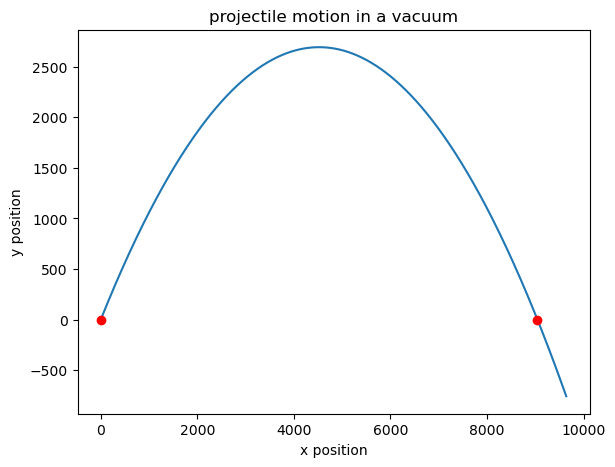

In [14]:
fig_A = plt.figure()
ax_A = fig_A.add_axes([0.2,0.2,0.8,0.8])
ax_A.plot(proj_vac_RK45.y[0], proj_vac_RK45.y[1], '')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('projectile motion in a vacuum')
for i in range(len(zero_locations)):
    ax_A.plot(zero_locations[i][0], zero_locations[i][1], 'ro')

print(f'ball hits the ground at x={round(zero_locations[1][0])}')

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

Found Zero at x = 0
Found Zero at x = 9043
ball hits the ground at x = 9043


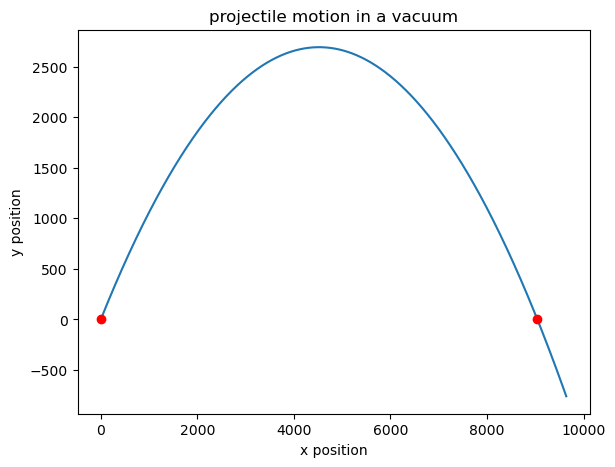

In [15]:
def rungekutta_4(f, t, initial_state):
    
    number_of_steps_taken = len(t)
    state = np.zeros((number_of_steps_taken, len(initial_state)))
    state[0] = initial_state
    
    for i in range (0, number_of_steps_taken-1): 
        dt = t[i+1] - t[i]
        k1 = f(t[i], state[i])
        k2 = f(t[i] + dt/2, state[i] + (dt/2)*k1)
        k3 = f(t[i] + dt/2, state[i] + (dt/2)*k2)
        k4 = f(t[i] + dt, state[i] + dt*k3)
        
        state[i+1] = state[i] + dt*k4
        
    return state

t0 = 0 #s
tf = 50 #s
t = np.linspace(t0, tf, 10_000)

proj_vac_my_RK4 = rungekutta_4(proj_vac, t, state_0)

my_zero_locations = []
for i in range(len(proj_vac_my_RK4)):
    if round(proj_vac_my_RK4[i][1]) == 0:
        my_zero_locations.append([proj_vac_my_RK4[i][0], 0])
        print(f'Found Zero at x = {round(proj_vac_my_RK4[i][0])}')

fig_B = plt.figure()
ax_B = fig_B.add_axes([0.2,0.2,0.8,0.8])
ax_B.plot(proj_vac_my_RK4[:,0], proj_vac_my_RK4[:,1], '')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('projectile motion in a vacuum')
for i in range(len(my_zero_locations)):
    ax_B.plot(my_zero_locations[i][0], my_zero_locations[i][1], 'ro')

print(f'ball hits the ground at x = {round(my_zero_locations[1][0])}')

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [84]:
def proj_drag (t, state):
    g_constant = 9.8 #m/s
    
    diameter = 0.15 #m
    radius = 0.075 #m
    density = 780.0 #g/m^3
    volume_sphere = (4/3)*(np.pi)*(radius**3) #m^3

    mass_grams = density*volume_sphere
    mass = mass_grams/1000
    
    gamma = 0.25
    
    c = (gamma) * (diameter**2)
    
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    x_ddot = -(c*((x_dot**2)+(y_dot**2))**(1/2))*x_dot/mass
    y_ddot = -(g_constant) - (c*((x_dot**2)+(y_dot**2))**(1/2))*y_dot/mass
    
    dstate_dt = np.array([x_dot, y_dot, x_ddot, y_ddot])
    
    return dstate_dt

0.0013783737767625215


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [73]:
initial_velocity = 300
firing_angle_in_degrees = 50
firing_angle_in_radians = 50 * np.pi/180

X_0, Y_0 = 0, 0
VX_0 = initial_velocity * np.cos(firing_angle_in_radians)
VY_0 = initial_velocity * np.sin(firing_angle_in_radians)

state_0 = [X_0, Y_0, VX_0, VY_0]

t0 = 0 #s
tf = 35 #s
t = np.linspace(t0, tf, 10_000)

proj_drag_RK45 = integrate.solve_ivp(proj_drag, (t0, tf), state_0, method='RK45', t_eval=t)

drag_zero_locations = []

for i in range(len(proj_drag_RK45.y[1])):
    if round(proj_drag_RK45.y[1][i]) == 0:
        drag_zero_locations.append([proj_drag_RK45.y[0][i], 0])
        #print(f'Found Zero at x = {round(proj_drag_RK45.y[0][i])}')

Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

ball hits the ground at x = 0


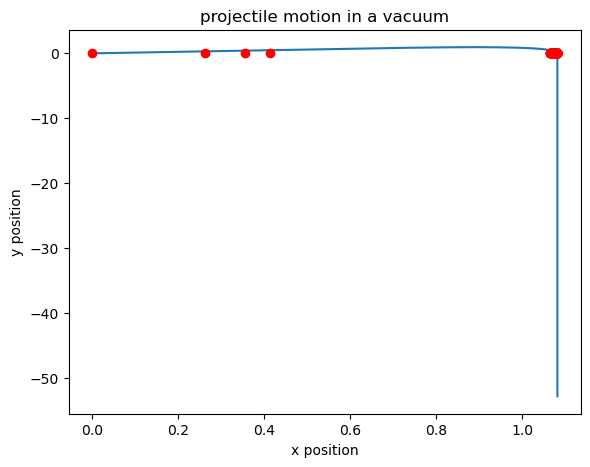

In [74]:
fig_C = plt.figure()
ax_C = fig_C.add_axes([0.2,0.2,0.8,0.8])
ax_C.plot(proj_drag_RK45.y[0], proj_drag_RK45.y[1], '')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('projectile motion in a vacuum')
for i in range(len(drag_zero_locations)):
    ax_C.plot(drag_zero_locations[i][0], drag_zero_locations[i][1], 'ro')

print(f'ball hits the ground at x = {round(drag_zero_locations[1][0])}')

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [79]:
def proj_quadratic_drag (t, state):
    g_constant = 9.8 #m/s
    
    x = state[0]
    y = state[1]
    
    x_dot = state[2]
    y_dot = state[3]
    
    gamma = 0.25 
    lambda_constant = 10_000
    diameter = 0.15 #m
    
    c = (gamma)*(diameter**2)*(np.exp(-y/lambda_constant))
    
    x_ddot = (-(c * ( (x_dot**2.0)+(y_dot**2.0) )**(1.0/2.0)) * x_dot)/mass
    y_ddot = -g_constant - ((c * ((x_dot**2)+(y_dot**2))**(1/2)) * y_dot)/mass
    
    dstate_dt = np.array([x_dot, y_dot, x_ddot, y_ddot])
    
    return dstate_dt

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [80]:
initial_velocity = 300
firing_angle_in_degrees = 50
firing_angle_in_radians = 50 * np.pi/180

X_0, Y_0 = 0, 0
VX_0 = initial_velocity * np.cos(firing_angle_in_radians)
VY_0 = initial_velocity * np.sin(firing_angle_in_radians)

state_0 = [X_0, Y_0, VX_0, VY_0]

t0 = 0 #s
tf = 35 #s
t = np.linspace(t0, tf, 10_000)

proj_quadratic_drag_RK45 = integrate.solve_ivp(proj_quadratic_drag, (t0, tf), state_0, method='RK45', t_eval=t)

Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

ball hits the ground at x = 0


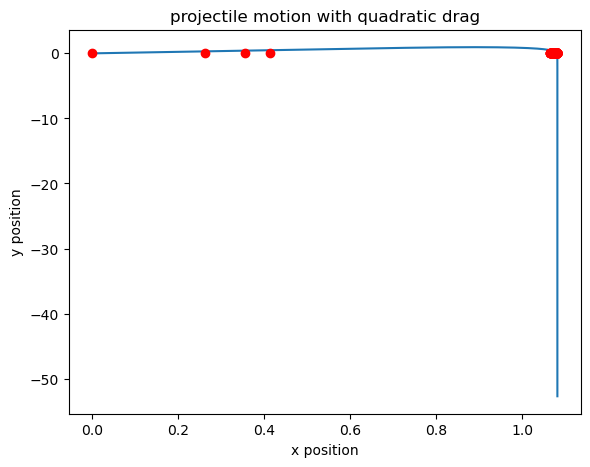

In [82]:
quadratic_drag_zero_locations = []

for i in range(len(proj_quadratic_drag_RK45.y[1])):
    if round(proj_quadratic_drag_RK45.y[1][i]) == 0:
        quadratic_drag_zero_locations.append([proj_quadratic_drag_RK45.y[0][i], 0])
        #print(f'Found Zero at x = {round(proj_quadratic_drag_RK45.y[0][i])}')

fig_D = plt.figure()
ax_D = fig_D.add_axes([0.2,0.2,0.8,0.8])
ax_D.plot(proj_quadratic_drag_RK45.y[0], proj_quadratic_drag_RK45.y[1], '')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('projectile motion with quadratic drag')
for i in range(len(quadratic_drag_zero_locations)):
    ax_D.plot(quadratic_drag_zero_locations[i][0], quadratic_drag_zero_locations[i][1], 'ro')

print(f'ball hits the ground at x = {round(quadratic_drag_zero_locations[1][0])}') 


# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

Text(0.5, 1.0, 'projectile motion comparison')

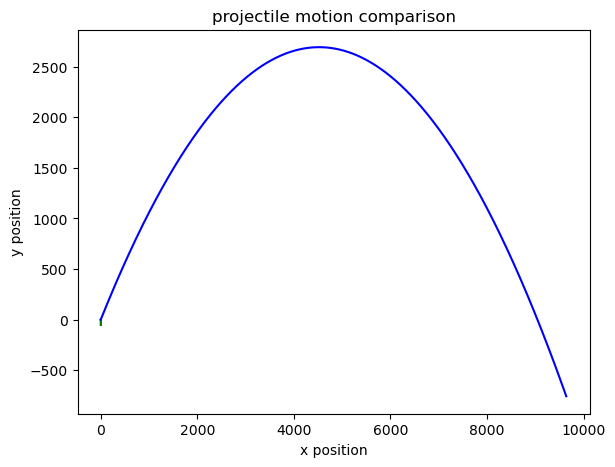

In [86]:
fig_E = plt.figure()
ax_E = fig_E.add_axes([0.2,0.2,0.8,0.8])

ax_E.plot(proj_quadratic_drag_RK45.y[0], proj_quadratic_drag_RK45.y[1], 'r')
ax_E.plot(proj_drag_RK45.y[0],           proj_drag_RK45.y[1], 'g')
ax_E.plot(proj_vac_RK45.y[0],            proj_vac_RK45.y[1], 'b')

plt.xlabel('x position')
plt.ylabel('y position')
plt.title('projectile motion comparison')

Your results should look like the plot below.

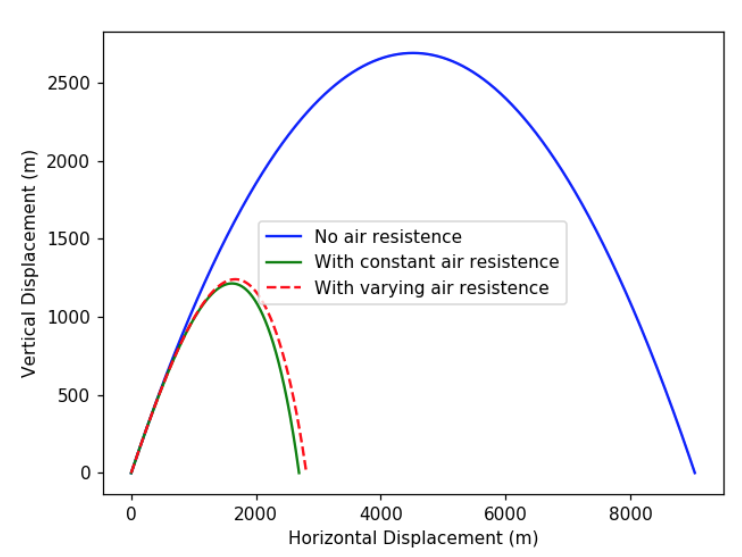

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

In [90]:
# C(0) impacts the motion more because accounting for variations in atmosphere accounts for
# a more accurate, less, amount of air resistance.